In [1]:
import pandas as pd
import numpy as np
import time
import requests
import urllib3
import re
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import unicodedata as ud

In [2]:
access_token = 'github_pat_11A2NF6WY0ZVqoOlu4f3EO_X'
# mAemHqAqRASLikNcpg8EXLO5lqGxxGV1pqmDlcfgA562GE5ZQA8lPjOjoU'
headers = {'Authorization':"Token "+access_token} 

In [3]:
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [4]:
def label_info(repository):
    page_num = 1
    labels = []
    while page_num < 11:
        try:
            url = f"https://api.github.com/repos/{repository}/labels?per_page=100&page={page_num}"
            label = requests.get(url,headers=headers,verify=False).json()
            result = label
            if result == []:
                page_num = 100
            else:
                labels.append(label)
                page_num = page_num + 1
        except:
            time.sleep(90)
            continue
    label_id = []
    label_node_id = []
    label_url = []
    label_name = []
    label_color = []
    label_default = []
    label_description = []
    for page in labels:
        for label in page:
            try:
                label_id.append(label['id'])
                label_node_id.append(label['node_id'])
                label_url.append(label['url'])
                label_name.append(label['name'])
                label_color.append(label['color'])
                label_default.append(label['default'])
                label_description.append(label['description'])
            except:
                pass
    label_data=pd.DataFrame()
    label_data['label_id']=label_id
    label_data['label_node_id']=label_node_id
    label_data['label_url']=label_url
    label_data['label_name']=label_name
    label_data['label_color']=label_color
    label_data['label_default']=label_default
    label_data['label_description']=label_description
    label_data=label_data.reset_index().drop(columns='index')
    return label_data

In [5]:
initial_repolist = pd.read_pickle('/Users/isdeniz/Documents/github/231008-initial-repolist-count-info.pkl')

In [6]:
print('total_issue_count: ',initial_repolist['issue_count'].sum())
print('total_open_issue_count: ',initial_repolist['open_issue_count'].sum())
print('total_closed_issue_count: ',initial_repolist['closed_issue_count'].sum())
print('total_pr_count: ',initial_repolist['pr_count'].sum())
print('total_open_pr_count: ',initial_repolist['open_pr_count'].sum())
print('total_closed_pr_count: ',initial_repolist['closed_pr_count'].sum())
print('total_commit_count: ',initial_repolist['commit_count'].sum())
print('total_release_count: ',initial_repolist['release_count'].sum())

total_issue_count:  480134.0
total_open_issue_count:  66878.0
total_closed_issue_count:  413256.0
total_pr_count:  460956.0
total_open_pr_count:  12176.0
total_closed_pr_count:  448780.0
total_commit_count:  2227380.0
total_release_count:  8249.0


Selecting the repositories satisfying thresholds in terms of the number of issues, pull requests, commits, and releases

In [7]:
repolist = initial_repolist[(initial_repolist.issue_count >= 1000) & (initial_repolist.pr_count >= 1000) & (initial_repolist.commit_count >= 1000) & (initial_repolist.release_count >= 50)]
repolist = repolist.reset_index(drop = True)
repolist.shape[0]

32

In [8]:
repolist

,repository_name,created_at,stargazers_count,watchers_count,open_issue_count,closed_issue_count,issue_count,open_pr_count,closed_pr_count,pr_count,commit_count,release_count
0,facebook/react-native,2015-01-09T18:10:16Z,112304.0,3631.0,1583.0,23680.0,25263.0,280.0,13956.0,14236.0,29273.0,276.0
1,spring-projects/spring-boot,2012-10-19T15:02:57Z,69590.0,3367.0,631.0,30825.0,31456.0,23.0,5850.0,5873.0,45478.0,249.0
2,elastic/elasticsearch,2010-02-08T13:20:56Z,65337.0,2680.0,3935.0,29241.0,33176.0,555.0,66416.0,66971.0,72450.0,123.0
3,spring-projects/spring-framework,2010-12-08T04:04:45Z,53315.0,3370.0,818.0,23309.0,24127.0,58.0,4351.0,4409.0,28190.0,268.0
4,ReactiveX/RxJava,2013-01-08T20:11:48Z,47252.0,2241.0,17.0,3119.0,3136.0,0.0,3799.0,3799.0,6051.0,233.0
5,apache/dubbo,2012-06-19T07:56:02Z,39423.0,3071.0,942.0,5546.0,6488.0,69.0,6459.0,6528.0,7125.0,90.0
6,dbeaver/dbeaver,2015-10-21T08:26:28Z,34008.0,514.0,1778.0,13556.0,15334.0,35.0,4522.0,4557.0,24773.0,184.0
7,halo-dev/halo,2018-03-21T12:56:52Z,28903.0,473.0,298.0,2515.0,2813.0,8.0,1662.0,1670.0,4514.0,136.0
8,SeleniumHQ/selenium,2013-01-14T21:40:56Z,27947.0,1320.0,189.0,9301.0,9490.0,55.0,3194.0,3249.0,30472.0,86.0
9,alibaba/nacos,2018-06-15T06:49:27Z,27620.0,912.0,244.0,7324.0,7568.0,28.0,3487.0,3515.0,4790.0,58.0


In [9]:
print('total_issue_count_of_selected_repos: ',repolist['issue_count'].sum())
print('total_open_issue_count_of_selected_repos: ',repolist['open_issue_count'].sum())
print('total_closed_issue_count_of_selected_repos: ',repolist['closed_issue_count'].sum())
print('total_pr_count_of_selected_repos: ',repolist['pr_count'].sum())
print('total_open_pr_count_of_selected_repos: ',repolist['open_pr_count'].sum())
print('total_closed_pr_count_of_selected_repos: ',repolist['closed_pr_count'].sum())
print('total_commit_count_of_selected_repos: ',repolist['commit_count'].sum())
print('total_release_count_of_selected_repos: ',repolist['release_count'].sum())

total_issue_count_of_selected_repos:  269376.0
total_open_issue_count_of_selected_repos:  28865.0
total_closed_issue_count_of_selected_repos:  240511.0
total_pr_count_of_selected_repos:  258711.0
total_open_pr_count_of_selected_repos:  3230.0
total_closed_pr_count_of_selected_repos:  255481.0
total_commit_count_of_selected_repos:  608033.0
total_release_count_of_selected_repos:  4582.0


In [10]:
issues = pd.read_pickle('/Users/isdeniz/Documents/github/231008-issues-time-label.pkl')

In [11]:
issues.head()

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,user,labels,state,locked,assignee,assignees,milestone,comments,created_at,updated_at,closed_at,author_association,active_lock_reason,body,reactions,timeline_url,performed_via_github_app,state_reason,score,repository_name,issue/pr,created_at_timestamp,closed_at_timestamp,issue_resolution_time,open_since,labels_id,labels_node_id,labels_name,labels_color,labels_default,labels_description
0,https://api.github.com/repos/facebook/react-native/issues/2,https://api.github.com/repos/facebook/react-native,['https://api.github.com/repos/facebook/react-native/labels/Resolution:%20Locked'],https://api.github.com/repos/facebook/react-native/issues/2/comments,https://api.github.com/repos/facebook/react-native/issues/2/events,https://github.com/facebook/react-native/issues/2,55988530,MDU6SXNzdWU1NTk4ODUzMA==,2,`pthread.h` not found,"{'login': 'jlongster', 'id': 17031, 'node_id': 'MDQ6VXNlcjE3MDMx', 'avatar_url': 'https://avatars.githubusercontent.com/u/17031?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/jlongster', 'html_url': 'https://github.com/jlongster', 'followers_url': 'https://api.github.com/users/jlongster/followers', 'following_url': 'https://api.github.com/users/jlongster/following{/other_user}', 'gists_url': 'https://api.github.com/users/jlongster/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/jlongster/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/jlongster/subscriptions', 'organizations_url': 'https://api.github.com/users/jlongster/orgs', 'repos_url': 'https://api.github.com/users/jlongster/repos', 'events_url': 'https://api.github.com/users/jlongster/events{/privacy}', 'received_events_url': 'https://api.github.com/users/jlongster/received_events', 'type': 'User', 'site_admin': False}","[{'id': 998095527, 'node_id': 'MDU6TGFiZWw5OTgwOTU1Mjc=', 'url': 'https://api.github.com/repos/facebook/react-native/labels/Resolution:%20Locked', 'name': 'Resolution: Locked', 'color': 'ffffff', 'default': False, 'description': 'This issue was locked by the bot.'}]",closed,True,None,[],None,2,2015-01-30T02:54:11Z,2018-07-23T05:02:58Z,2015-01-31T00:04:06Z,NONE,resolved,"To build on my machine (OS X 10.9.3) targeting iOS SDK 7.1 (only one available on my machine), I had to change line 7 in `/ReactKit/Modules/RCTUIManager.m` from `#import <pthread/pthread.h>` to `#import <pthread.h>` to get it to compile.\n","{'url': 'https://api.github.com/repos/facebook/react-native/issues/2/reactions', 'total_count': 0, '+1': 0, '-1': 0, 'laugh': 0, 'hooray': 0, 'confused': 0, 'heart': 0, 'rocket': 0, 'eyes': 0}",https://api.github.com/repos/facebook/react-native/issues/2/timeline,None,completed,1.0,facebook/react-native,issue,2015-01-30 02:54:11,2015-01-31 00:04:06,0.881887,NaN,[998095527],['MDU6TGFiZWw5OTgwOTU1Mjc='],['Resolution: Locked'],['ffffff'],[False],['This issue was locked by the bot.']
1,https://api.github.com/repos/facebook/react-native/issues/4,https://api.github.com/repos/facebook/react-native,['https://api.github.com/repos/facebook/react-native/labels/Resolution:%20Locked'],https://api.github.com/repos/facebook/react-native/issues/4/comments,https://api.github.com/repos/facebook/react-native/issues/4/events,https://github.com/facebook/react-native/issues/4,56060794,MDU6SXNzdWU1NjA2MDc5NA==,4,Set UIStatusBarStyleLightContent,"{'login': 'nick', 'id': 939, 'node_id': 'MDQ6VXNlcjkzOQ==', 'avatar_url': 'https://avatars.githubusercontent.com/u/939?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/nick', 'html_url': 'https://github.com/nick', 'followers_url': 'https://api.github.com/users/nick/followers', 'following_url': 'https://api.github.com/users/nick/following{/other_user}', 'gists_url': 'https://api.github.com/users/nick/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/nick/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/nick/subscriptions', 'org

In [12]:
issues.shape[0]

269188

In [13]:
issues['state'].value_counts()

state
closed    240528
open       28660
Name: count, dtype: int64

Open issues are dropped out

In [14]:
closed_df = issues[issues['state'] == 'closed']
closed_df = closed_df.reset_index(drop = True)

In [15]:
closed_df.shape[0]

240528

Issues that have no label are dropped out

In [16]:
closed_df[closed_df['labels_name'] == 'no_label'].shape[0]

42447

In [17]:
filtered_df = closed_df[closed_df['labels_name'] != 'no_label'].copy(deep = True).reset_index(drop = True)

In [18]:
filtered_df.shape[0]

198081

Dropping 2 repositories since their issues are not in English

In [19]:
filtered_df = filtered_df[filtered_df['repository_name'] != 'halo-dev/halo'].copy(deep = True).reset_index(drop = True)
filtered_df = filtered_df[filtered_df['repository_name'] != 'alibaba/nacos'].copy(deep = True).reset_index(drop = True)
filtered_df.shape[0]

190436

Considering labels of each repository

In [20]:
r = filtered_df['repository_name'].unique()

In [21]:
r

array(['facebook/react-native', 'spring-projects/spring-boot',
       'elastic/elasticsearch', 'spring-projects/spring-framework',
       'ReactiveX/RxJava', 'apache/dubbo', 'dbeaver/dbeaver',
       'SeleniumHQ/selenium', 'TeamNewPipe/NewPipe', 'apache/skywalking',
       'bazelbuild/bazel', 'Anuken/Mindustry', 'apache/shardingsphere',
       'OpenAPITools/openapi-generator', 'openzipkin/zipkin',
       'thingsboard/thingsboard', 'mockito/mockito', 'elastic/logstash',
       'apache/pulsar', 'GoogleContainerTools/jib',
       'pinpoint-apm/pinpoint', 'apache/druid', 'questdb/questdb',
       'quarkusio/quarkus', 'codecentric/spring-boot-admin',
       'neo4j/neo4j', 'redis/jedis', 'zaproxy/zaproxy', 'grpc/grpc-java',
       'Netflix/conductor'], dtype=object)

In [22]:
len(r)

30

Getting the defined labels 

In [23]:
i = 0
labels_df = pd.DataFrame()
while i < repolist.shape[0]:
    repository = repolist.loc[i,'repository_name']
    print(repository, i)
    new_labels = label_info(repository)
    labels_df = pd.concat([labels_df, new_labels], ignore_index = True)
    i = i + 1
repository_name = labels_df["label_url"].str.split("/", n = 6, expand = True)
repository_name2 = repository_name[4] + "/" + repository_name[5]
labels_df['repository_name'] = repository_name2
labels_df.head()

facebook/react-native 0
spring-projects/spring-boot 1
elastic/elasticsearch 2
spring-projects/spring-framework 3
ReactiveX/RxJava 4
apache/dubbo 5
dbeaver/dbeaver 6
halo-dev/halo 7
SeleniumHQ/selenium 8
alibaba/nacos 9
TeamNewPipe/NewPipe 10
apache/skywalking 11
bazelbuild/bazel 12
Anuken/Mindustry 13
apache/shardingsphere 14
OpenAPITools/openapi-generator 15
openzipkin/zipkin 16
thingsboard/thingsboard 17
mockito/mockito 18
elastic/logstash 19
apache/pulsar 20
GoogleContainerTools/jib 21
pinpoint-apm/pinpoint 22
apache/druid 23
questdb/questdb 24
quarkusio/quarkus 25
codecentric/spring-boot-admin 26
neo4j/neo4j 27
redis/jedis 28
zaproxy/zaproxy 29
grpc/grpc-java 30
Netflix/conductor 31


,label_id,label_node_id,label_url,label_name,label_color,label_default,label_description,repository_name
0,4884403361,LA_kwDOAbrxp88AAAABIyIUoQ,https://api.github.com/repos/facebook/react-native/labels/:open_umbrella:%20Umbrella,:open_umbrella: Umbrella,F5A351,False,To label issues that serve as coordination point and drivers for tasks in the react-native repo,facebook/react-native
1,1207200873,MDU6TGFiZWwxMjA3MjAwODcz,https://api.github.com/repos/facebook/react-native/labels/Accessibility,Accessibility,ffffff,False,,facebook/react-native
2,2726583423,MDU6TGFiZWwyNzI2NTgzNDIz,https://api.github.com/repos/facebook/react-native/labels/Accessibility%20Team%20-%20Evaluated,Accessibility Team - Evaluated,21DAFA,False,,facebook/react-native
3,7099448503,LA_kwDOAbrxp88AAAABpyj8tw,https://api.github.com/repos/facebook/react-native/labels/amazon,amazon,ededed,False,None,facebook/react-native
4,1113219688,MDU6TGFiZWwxMTEzMjE5Njg4,https://api.github.com/repos/facebook/react-native/labels/API:%20AccessibilityInfo,API: AccessibilityInfo,fef2c0,False,,facebook/react-native


In [24]:
labels_df

,label_id,label_node_id,label_url,label_name,label_color,label_default,label_description,repository_name
0,4884403361,LA_kwDOAbrxp88AAAABIyIUoQ,https://api.github.com/repos/facebook/react-native/labels/:open_umbrella:%20Umbrella,:open_umbrella: Umbrella,F5A351,False,To label issues that serve as coordination point and drivers for tasks in the react-native repo,facebook/react-native
1,1207200873,MDU6TGFiZWwxMjA3MjAwODcz,https://api.github.com/repos/facebook/react-native/labels/Accessibility,Accessibility,ffffff,False,,facebook/react-native
2,2726583423,MDU6TGFiZWwyNzI2NTgzNDIz,https://api.github.com/repos/facebook/react-native/labels/Accessibility%20Team%20-%20Evaluated,Accessibility Team - Evaluated,21DAFA,False,,facebook/react-native
3,7099448503,LA_kwDOAbrxp88AAAABpyj8tw,https://api.github.com/repos/facebook/react-native/labels/amazon,amazon,ededed,False,None,facebook/react-native
4,1113219688,MDU6TGFiZWwxMTEzMjE5Njg4,https://api.github.com/repos/facebook/react-native/labels/API:%20AccessibilityInfo,API: AccessibilityInfo,fef2c0,False,,facebook/react-native
...,...,...,...,...,...,...,...,...
3112,2879918767,MDU6TGFiZWwyODc5OTE4NzY3,https://api.github.com/repos/Netflix/conductor/labels/type:%20important,type: important,81EE55,False,Important changes,Netflix/conductor
3113,2879921812,MDU6TGFiZWwyODc5OTIxODEy,https://api.github.com/repos/Netflix/conductor/labels/type:%20maintenance,type: maintenance,7B4913,False,Refactoring,Netflix/conductor
3114,2368959500,MDU6TGFiZWwyMzY4OTU5NTAw,https://api.github.com/repos/Netflix/conductor/labels/UI,UI,dd49b3,False,User Interface bugs and issues,Netflix/conductor
3115,496598857,MDU6TGFiZWw0OTY1OTg4NTc=,https://api.github.com/repos/Netflix/conductor/labels/wontfix,wontfix,ffffff,True,None,Netflix/conductor


In [25]:
labels_df.shape[0]

3117

In [26]:
import ast

def safe_eval(x):
    if x == 'no_label':
        return []
    try:
        return ast.literal_eval(x)
    except (SyntaxError, ValueError):
        return None

def label_details(repository):
    issues_temp = filtered_df.copy(deep = True)
    issues_temp = issues_temp[issues_temp['repository_name'] == repository]
    issues_temp = issues_temp.reset_index(drop = True)
    
    c = ['repository_name','label','count']

    l = pd.DataFrame(columns = c)

    issues_temp['labels_name'] = issues_temp['labels_name'].apply(safe_eval)
    issues_temp = issues_temp.dropna(subset = ['labels_name'])
    issues_temp_exploded = issues_temp.explode('labels_name').reset_index(drop = True)

    label_counts = issues_temp_exploded['labels_name'].value_counts().reset_index(name = 'countofissues')
    label_counts_sorted = label_counts.sort_values(by = 'countofissues', ascending = False)

    i = 0
    while i < label_counts_sorted.shape[0]:
            l.loc[i,'repository_name'] = repository
            l.loc[i,'label'] = label_counts_sorted.loc[i,'labels_name']
            l.loc[i,'count'] = label_counts_sorted.loc[i,'countofissues']
            i = i + 1

    return l 

In [27]:
label_issue_count = pd.DataFrame()
i = 0 
while i < len(r):
    new_label_issue_count = label_details(r[i])
    label_issue_count = pd.concat([label_issue_count, new_label_issue_count], ignore_index = True)
    i = i + 1 

In [28]:
no_labels = pd.DataFrame()
i = 0 
while i < len(r):
    repository = repolist.loc[i,'repository_name']
    issues_temp = filtered_df.copy(deep = True)
    issues_temp = issues_temp[issues_temp['repository_name'] == repository]
    issues_temp = issues_temp.reset_index(drop = True)
    no_labels.loc[i,'repository_name'] = repository
    no_labels.loc[i,'label'] = 'no_label'
    no_labels.loc[i,'count'] = issues_temp[issues_temp['labels_name'] == 'no_label'].shape[0]
    i = i + 1

In [29]:
label_issue_count = pd.concat([label_issue_count, no_labels], ignore_index = True)
label_issue_count = label_issue_count.reset_index(drop = True)
label_issue_count.head()

,repository_name,label,count
0,facebook/react-native,Resolution: Locked,17973
1,facebook/react-native,Ran Commands,5204
2,facebook/react-native,Stale,4035
3,facebook/react-native,Bug,3060
4,facebook/react-native,Needs: Triage :mag:,2687


In [30]:
label_issue_count = pd.merge(label_issue_count, labels_df,  how = 'left', left_on = ['repository_name','label'], right_on = ['repository_name','label_name'])
label_issue_count.head()

,repository_name,label,count,label_id,label_node_id,label_url,label_name,label_color,label_default,label_description
0,facebook/react-native,Resolution: Locked,17973,9.980955e+08,MDU6TGFiZWw5OTgwOTU1Mjc=,https://api.github.com/repos/facebook/react-native/labels/Resolution:%20Locked,Resolution: Locked,ffffff,False,This issue was locked by the bot.
1,facebook/react-native,Ran Commands,5204,3.372173e+08,MDU6TGFiZWwzMzcyMTcyNTQ=,https://api.github.com/repos/facebook/react-native/labels/Ran%20Commands,Ran Commands,ffffff,False,One of our bots successfully processed a command.
2,facebook/react-native,Stale,4035,7.182418e+08,MDU6TGFiZWw3MTgyNDE4MDc=,https://api.github.com/repos/facebook/react-native/labels/Stale,Stale,e99695,False,There has been a lack of activity on this issue and it may be closed soon.
3,facebook/react-native,Bug,3060,1.304118e+09,MDU6TGFiZWwxMzA0MTE3NTQ0,https://api.github.com/repos/facebook/react-native/labels/Bug,Bug,ffffff,False,
4,facebook/react-native,Needs: Triage :mag:,2687,1.794148e+09,MDU6TGFiZWwxNzk0MTQ4MzQ3,https://api.github.com/repos/facebook/react-native/labels/Needs:%20Triage%20:mag:,Needs: Triage :mag:,bfd4f2,False,


In [31]:
columns_to_drop = ['label_id', 'label_node_id','label_url','label_color','label_default','label_name']
label_issue_count.drop(columns = columns_to_drop, inplace = True)

In [32]:
last_column = label_issue_count.pop('label_description')
label_issue_count.insert(2, 'label_description', last_column)
label_issue_count.head()

,repository_name,label,label_description,count
0,facebook/react-native,Resolution: Locked,This issue was locked by the bot.,17973
1,facebook/react-native,Ran Commands,One of our bots successfully processed a command.,5204
2,facebook/react-native,Stale,There has been a lack of activity on this issue and it may be closed soon.,4035
3,facebook/react-native,Bug,,3060
4,facebook/react-native,Needs: Triage :mag:,,2687


In [33]:
def body_text_count(repository,text):
    issues_temp = filtered_df.copy(deep = True)
    issues_temp = issues_temp[issues_temp['repository_name'] == repository]
    issues_temp = issues_temp.reset_index(drop = True)

    issues_temp['text_info'] = issues_temp['body'].apply(lambda x: 'yes' if x is not None and text in x else 'no')
    print(f'number of issues with {text} in body: ', issues_temp[issues_temp['text_info'] == 'yes'].shape[0])
    
    return None

Label Mapping

In [34]:
filtered_df['mapLabel'] = 'roma'

In [35]:
def label_mapping(repository_name,labels_name,i,df_x):
    found_bug = False
    mapLabel = 'roma'
    if labels_name == 'no_label':
        mapLabel = 'no_label'
    else:
        if repository_name == df_x.loc[i,'src_project']:
            cell_value = labels_name
            search_text = df_x.loc[i,'src_project_label']
            cell_value_list = ast.literal_eval(cell_value)
            found_bug = search_text in cell_value_list
            if found_bug:
                mapLabel = df_x.loc[i,'mapLabel']
                #print(cell_value)
    return mapLabel

In [36]:
def remaining_label_details(repository):
    label_counts = filtered_df[filtered_df['repository_name'] == repository]['mapLabel'].value_counts().reset_index(name = 'countofissues')
    label_counts_sorted = label_counts.sort_values(by = 'countofissues', ascending = False)
    print(label_counts_sorted)
    issues_temp = filtered_df.copy(deep = True)
    issues_temp = issues_temp[issues_temp['repository_name'] == repository]
    issues_temp = issues_temp.reset_index(drop = True)
    issues_temp = issues_temp[issues_temp['mapLabel'] == 'roma']
    issues_temp = issues_temp.reset_index(drop = True)
    
    c = ['repository_name','label','count','percentage']

    l = pd.DataFrame(columns=c)

    issues_temp['labels_name'] = issues_temp['labels_name'].apply(safe_eval)
    issues_temp = issues_temp.dropna(subset = ['labels_name'])
    issues_temp_exploded = issues_temp.explode('labels_name').reset_index(drop = True)

    label_counts = issues_temp_exploded['labels_name'].value_counts().reset_index(name = 'countofissues')
    label_counts_sorted = label_counts.sort_values(by = 'countofissues', ascending = False)

    i = 0
    while i < label_counts_sorted.shape[0]:
            l.loc[i,'repository_name'] = repository
            l.loc[i,'label'] = label_counts_sorted.loc[i,'labels_name']
            l.loc[i,'count'] = label_counts_sorted.loc[i,'countofissues']
            l.loc[i,'percentage'] = l.loc[i,'count'] / issues_temp.shape[0]
            i = i + 1

    return l.head(10)

In [37]:
def remaining_label_details_total():
    label_counts = filtered_df['mapLabel'].value_counts().reset_index(name = 'countofissues')
    label_counts_sorted = label_counts.sort_values(by = 'countofissues', ascending = False)
    label_counts_sorted['%'] = (label_counts_sorted['countofissues']/filtered_df.shape[0]) * 100
    print(label_counts_sorted)
    print(filtered_df.shape[0])

In [38]:
def remaining_label_details_total_df():
    label_counts = filtered_df['mapLabel'].value_counts().reset_index(name = 'countofissues')
    label_counts_sorted = label_counts.sort_values(by = 'countofissues', ascending = False)
    label_counts_sorted['%'] = (label_counts_sorted['countofissues']/filtered_df.shape[0]) * 100
    return label_counts_sorted

In [39]:
def get_new_labels(df, df_values, sizes, labels):
    new_labels = [label if size > df[f'{df_values}'].sum()*0.04 else '' for size, label in zip(sizes, labels)]
    return new_labels

custom_colors = ['#004d99', 
                 '#1a8cff', 
                 '#66b3ff','#66b3ff', 
                 '#99ccff','#99ccff',
                 '#808080','#808080','#808080','#808080','#808080','#808080','#808080','#808080','#808080','#808080','#808080']

def plt_pieChart(df, df_categories, df_values):
    sizes = df[f'{df_values}']
    labels = df[f'{df_categories}']
    total_size = sizes.sum()
    autopct_values = ['%1.1f%%' % (100 * size / total_size) if size > total_size * 0.04 else '' for size in sizes]
    plt.figure(figsize=(8, 6))
    ax = df.plot.pie(y = f'{df_values}', 
                     autopct = lambda p: autopct_values.pop(0),
                     labels = get_new_labels(df, df_values, sizes, labels), 
                     colors = custom_colors, 
                     wedgeprops = dict(edgecolor = 'w', linewidth = 0),
                     textprops={'fontsize': 8})
    ax.get_legend().remove()
    ax.set_ylabel('')

Round 1 - Confidence = 100% Classification of bugs and enhancements

In [40]:
label_mapping_df_1 = pd.read_excel("/Users/isdeniz/Documents/github/Summary-2406/label_mapping_round1_2406.xlsx")
label_mapping_df_1.head()

,rule,src_project,src_project_label,mapLabel,confidence,defined_label_description,notes
0,0,facebook/react-native,Bug,bug,1,NaN,NaN
1,1,facebook/react-native,Impact: Bug,bug,1,The issue represents a bug somewhere,NaN
2,2,facebook/react-native,Issue: Author Provided Repro,bug,1,This issue can be reproduced in Snack or an attached project.,NaN
3,3,facebook/react-native,📮Known Issues,bug,1,This indicates an issue that refers to a bug or limitation of RN that is not currently being handled,NaN
4,4,facebook/react-native,Type: Enhancement,enhancement,1,A new feature or enhancement of an existing feature.,NaN


In [41]:
i = 0
while i < label_mapping_df_1.shape[0]:
    filtered_df.loc[filtered_df['mapLabel'] == 'roma', 'mapLabel'] = filtered_df.loc[filtered_df['mapLabel'] == 'roma'].apply(lambda row: label_mapping(row['repository_name'], row['labels_name'], i, label_mapping_df_1), axis = 1)
    i = i + 1 

In [42]:
remaining_label_details_total()

      mapLabel  countofissues          %
0         roma         100147  52.588271
1          bug          54780  28.765570
2  enhancement          26225  13.771031
3      feature           8804   4.623075
4     proposal            346   0.181688
5  improvement            126   0.066164
6   suggestion              8   0.004201
190436


In [43]:
df_result = remaining_label_details_total_df()
df_result

,mapLabel,countofissues,%
0,roma,100147,52.588271
1,bug,54780,28.765570
2,enhancement,26225,13.771031
3,feature,8804,4.623075
4,proposal,346,0.181688
5,improvement,126,0.066164
6,suggestion,8,0.004201


<Figure size 800x600 with 0 Axes>

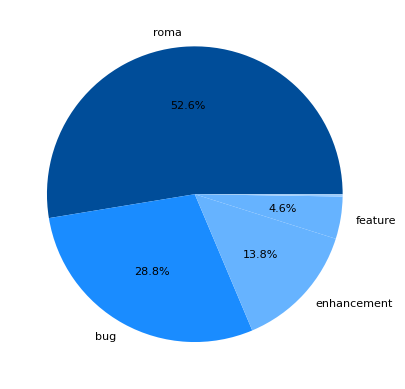

In [44]:
plt_pieChart(df_result, 'mapLabel', 'countofissues')

Review of Round 1

In [45]:
r = filtered_df['repository_name'].unique()

0. facebook/react-native

In [46]:
remaining_label_details(r[0])

      mapLabel  countofissues
0         roma          20325
1          bug           3201
2  enhancement             61


,repository_name,label,count,percentage
0,facebook/react-native,Resolution: Locked,15998,0.787109
1,facebook/react-native,Ran Commands,4493,0.221058
2,facebook/react-native,Stale,2855,0.140467
3,facebook/react-native,Needs: Triage :mag:,2676,0.131661
4,facebook/react-native,Platform: Android,1740,0.085609
5,facebook/react-native,Platform: iOS,1465,0.072079
6,facebook/react-native,Type: Question,823,0.040492
7,facebook/react-native,Needs: Author Feedback,820,0.040344
8,facebook/react-native,Resolution: For Stack Overflow,513,0.02524
9,facebook/react-native,Needs: Repro,482,0.023715


1. spring-projects/spring-boot

In [47]:
remaining_label_details(r[1])

      mapLabel  countofissues
0         roma          21690
1          bug           3407
2  enhancement           3298


,repository_name,label,count,percentage
0,spring-projects/spring-boot,type: dependency-upgrade,6501,0.299723
1,spring-projects/spring-boot,type: task,4060,0.187183
2,spring-projects/spring-boot,status: invalid,3626,0.167174
3,spring-projects/spring-boot,status: forward-port,2606,0.120148
4,spring-projects/spring-boot,type: documentation,2075,0.095666
5,spring-projects/spring-boot,status: duplicate,1519,0.070032
6,spring-projects/spring-boot,for: stackoverflow,1516,0.069894
7,spring-projects/spring-boot,status: declined,1351,0.062287
8,spring-projects/spring-boot,for: external-project,1259,0.058045
9,spring-projects/spring-boot,status: superseded,1022,0.047118


2. elastic/elasticsearch

In [48]:
remaining_label_details(r[2])

      mapLabel  countofissues
0         roma          11511
1          bug           5930
2  enhancement           4266
3      feature            838


,repository_name,label,count,percentage
0,elastic/elasticsearch,>test-failure,4791,0.416211
1,elastic/elasticsearch,>docs,1332,0.115715
2,elastic/elasticsearch,Team:Delivery,1216,0.105638
3,elastic/elasticsearch,Team:Distributed,829,0.072018
4,elastic/elasticsearch,feedback_needed,820,0.071236
5,elastic/elasticsearch,discuss,815,0.070802
6,elastic/elasticsearch,:Search/Search,787,0.068369
7,elastic/elasticsearch,:Delivery/Build,784,0.068109
8,elastic/elasticsearch,>test,667,0.057945
9,elastic/elasticsearch,:Distributed/Snapshot/Restore,614,0.05334


3. spring-projects/spring-framework

In [49]:
remaining_label_details(r[3])

      mapLabel  countofissues
0         roma           9144
1  enhancement           8974
2          bug           4710


,repository_name,label,count,percentage
0,spring-projects/spring-framework,in: core,2593,0.283574
1,spring-projects/spring-framework,in: web,2287,0.250109
2,spring-projects/spring-framework,status: invalid,1723,0.18843
3,spring-projects/spring-framework,status: declined,1714,0.187445
4,spring-projects/spring-framework,type: task,1617,0.176837
5,spring-projects/spring-framework,type: documentation,983,0.107502
6,spring-projects/spring-framework,status: bulk-closed,767,0.08388
7,spring-projects/spring-framework,status: duplicate,764,0.083552
8,spring-projects/spring-framework,in: data,596,0.065179
9,spring-projects/spring-framework,type: regression,412,0.045057


4. ReactiveX/RxJava

In [50]:
remaining_label_details(r[4])

      mapLabel  countofissues
0         roma           1843
1          bug            266
2  enhancement            202
3      feature            124


,repository_name,label,count,percentage
0,ReactiveX/RxJava,Question,1102,0.597938
1,ReactiveX/RxJava,2.x,659,0.357569
2,ReactiveX/RxJava,Documentation,174,0.094411
3,ReactiveX/RxJava,3.x,172,0.093326
4,ReactiveX/RxJava,Information,134,0.072708
5,ReactiveX/RxJava,Discussion,133,0.072165
6,ReactiveX/RxJava,1.x,126,0.068367
7,ReactiveX/RxJava,PR welcome,115,0.062398
8,ReactiveX/RxJava,Android,76,0.041237
9,ReactiveX/RxJava,StackOverflow,72,0.039067


5. apache/dubbo

In [51]:
remaining_label_details(r[5])

      mapLabel  countofissues
0         roma           1157
1          bug            631
2     proposal            112
3  enhancement             16


,repository_name,label,count,percentage
0,apache/dubbo,type/question,531,0.458946
1,apache/dubbo,help wanted,232,0.200519
2,apache/dubbo,good first issue,118,0.101988
3,apache/dubbo,status/waiting-for-feedback,99,0.085566
4,apache/dubbo,type/feature,92,0.079516
5,apache/dubbo,type/discussion,90,0.077787
6,apache/dubbo,type/suspicious,57,0.049265
7,apache/dubbo,status/need-triage,39,0.033708
8,apache/dubbo,level/easy,28,0.024201
9,apache/dubbo,type/refactor,23,0.019879


6. dbeaver/dbeaver

In [52]:
remaining_label_details(r[6])

      mapLabel  countofissues
0          bug           7105
1      feature           2045
2         roma           1568
3  enhancement           1018


,repository_name,label,count,percentage
0,dbeaver/dbeaver,question,786,0.501276
1,dbeaver/dbeaver,wait for response,308,0.196429
2,dbeaver/dbeaver,can't reproduce,218,0.139031
3,dbeaver/dbeaver,duplicate,104,0.066327
4,dbeaver/dbeaver,x:postgresql,75,0.047832
5,dbeaver/dbeaver,x:oracle,64,0.040816
6,dbeaver/dbeaver,x:mssql,54,0.034439
7,dbeaver/dbeaver,x:mysql,48,0.030612
8,dbeaver/dbeaver,xf:sql,47,0.029974
9,dbeaver/dbeaver,wiki,44,0.028061


7. SeleniumHQ/selenium

In [53]:
remaining_label_details(r[7])

      mapLabel  countofissues
0         roma           3144
1          bug           1146
2  enhancement            325


,repository_name,label,count,percentage
0,SeleniumHQ/selenium,R-awaiting answer,846,0.269084
1,SeleniumHQ/selenium,C-java,400,0.127226
2,SeleniumHQ/selenium,D-IE,321,0.102099
3,SeleniumHQ/selenium,C-grid,295,0.09383
4,SeleniumHQ/selenium,C-py,294,0.093511
5,SeleniumHQ/selenium,D-firefox,292,0.092875
6,SeleniumHQ/selenium,C-nodejs,272,0.086514
7,SeleniumHQ/selenium,C-dotnet,248,0.07888
8,SeleniumHQ/selenium,needs-triaging,230,0.073155
9,SeleniumHQ/selenium,C-rb,146,0.046438


8. TeamNewPipe/NewPipe

In [54]:
remaining_label_details(r[8])

  mapLabel  countofissues
0     roma           1983
1      bug           1941
2  feature           1291


,repository_name,label,count,percentage
0,TeamNewPipe/NewPipe,duplicate,1176,0.593041
1,TeamNewPipe/NewPipe,template ignored,1129,0.569339
2,TeamNewPipe/NewPipe,question,310,0.156329
3,TeamNewPipe/NewPipe,template missing,212,0.106909
4,TeamNewPipe/NewPipe,meta,70,0.0353
5,TeamNewPipe/NewPipe,discussion,31,0.015633
6,TeamNewPipe/NewPipe,waiting for author,23,0.011599
7,TeamNewPipe/NewPipe,localisation / translation,22,0.011094
8,TeamNewPipe/NewPipe,wontfix,22,0.011094
9,TeamNewPipe/NewPipe,device/software specific,17,0.008573


9. apache/skywalking

In [55]:
remaining_label_details(r[9])

      mapLabel  countofissues
0         roma           2565
1          bug            996
2      feature            760
3  enhancement            102


,repository_name,label,count,percentage
0,apache/skywalking,question,1847,0.720078
1,apache/skywalking,agent,155,0.060429
2,apache/skywalking,invalid,121,0.047173
3,apache/skywalking,backend,120,0.046784
4,apache/skywalking,wontfix,96,0.037427
5,apache/skywalking,duplicate,86,0.033528
6,apache/skywalking,documentation,85,0.033138
7,apache/skywalking,plugin,71,0.02768
8,apache/skywalking,core feature,69,0.026901
9,apache/skywalking,discussion,62,0.024172


10. bazelbuild/bazel

In [56]:
remaining_label_details(r[10])

  mapLabel  countofissues
0     roma           3308
1      bug           3262
2  feature           1923


,repository_name,label,count,percentage
0,bazelbuild/bazel,P1,660,0.199516
1,bazelbuild/bazel,untriaged,595,0.179867
2,bazelbuild/bazel,P2,590,0.178356
3,bazelbuild/bazel,team-OSS,573,0.173216
4,bazelbuild/bazel,type: documentation (cleanup),568,0.171705
5,bazelbuild/bazel,type: process,378,0.114268
6,bazelbuild/bazel,under investigation,336,0.101572
7,bazelbuild/bazel,P3,325,0.098247
8,bazelbuild/bazel,type: support / not a bug (process),297,0.089782
9,bazelbuild/bazel,team-Rules-CPP,262,0.079202


11. Anuken/Mindustry

In [57]:
remaining_label_details(r[11])

  mapLabel  countofissues
0      bug           2810
1     roma             18


,repository_name,label,count,percentage
0,Anuken/Mindustry,help wanted,8,0.444444
1,Anuken/Mindustry,a disgrace,8,0.444444
2,Anuken/Mindustry,draft,2,0.111111


12. apache/shardingsphere

In [58]:
remaining_label_details(r[12])

      mapLabel  countofissues
0         roma           6566
1  enhancement           1196
2          bug           1086
3      feature            107


,repository_name,label,count,percentage
0,apache/shardingsphere,status: invalid,2049,0.312062
1,apache/shardingsphere,type: question,1357,0.206671
2,apache/shardingsphere,in: test,723,0.110113
3,apache/shardingsphere,good first issue,581,0.088486
4,apache/shardingsphere,type: duplicate,519,0.079044
5,apache/shardingsphere,type: refactor,458,0.069753
6,apache/shardingsphere,in: SQL parse,265,0.040359
7,apache/shardingsphere,feature: sharding,238,0.036247
8,apache/shardingsphere,in: document,229,0.034877
9,apache/shardingsphere,in: proxy,185,0.028175


13. OpenAPITools/openapi-generator

In [59]:
remaining_label_details(r[13])

      mapLabel  countofissues
0          bug           2063
1  enhancement            654
2         roma            202
3      feature             62
4   suggestion              8


,repository_name,label,count,percentage
0,OpenAPITools/openapi-generator,Client: Python,32,0.158416
1,OpenAPITools/openapi-generator,General: Question,22,0.108911
2,OpenAPITools/openapi-generator,Announcement,21,0.10396
3,OpenAPITools/openapi-generator,Client: TypeScript,17,0.084158
4,OpenAPITools/openapi-generator,Client: Java,12,0.059406
5,OpenAPITools/openapi-generator,General: Discussion,12,0.059406
6,OpenAPITools/openapi-generator,Issue: Invalid spec,9,0.044554
7,OpenAPITools/openapi-generator,Server: C++,9,0.044554
8,OpenAPITools/openapi-generator,Swagger-Parser,8,0.039604
9,OpenAPITools/openapi-generator,Client: Rust,6,0.029703


14. openzipkin/zipkin

In [60]:
remaining_label_details(r[14])

      mapLabel  countofissues
0         roma            303
1  enhancement            178
2          bug            156


,repository_name,label,count,percentage
0,openzipkin/zipkin,question,156,0.514851
1,openzipkin/zipkin,ui,67,0.221122
2,openzipkin/zipkin,elasticsearch,27,0.089109
3,openzipkin/zipkin,releng,19,0.062706
4,openzipkin/zipkin,docs,16,0.052805
5,openzipkin/zipkin,help wanted,16,0.052805
6,openzipkin/zipkin,cassandra,15,0.049505
7,openzipkin/zipkin,duplicate,14,0.046205
8,openzipkin/zipkin,chore,13,0.042904
9,openzipkin/zipkin,feedback-needed,10,0.033003


15. thingsboard/thingsboard

In [61]:
remaining_label_details(r[15])

      mapLabel  countofissues
0         roma           1944
1  enhancement              8


,repository_name,label,count,percentage
0,thingsboard/thingsboard,Question,1098,0.564815
1,thingsboard/thingsboard,Bug,644,0.331276
2,thingsboard/thingsboard,Feature,194,0.099794
3,thingsboard/thingsboard,Contributions Welcome!,5,0.002572
4,thingsboard/thingsboard,UI,4,0.002058
5,thingsboard/thingsboard,Edge,2,0.001029
6,thingsboard/thingsboard,invalid,1,0.000514
7,thingsboard/thingsboard,Docs enhancement,1,0.000514
8,thingsboard/thingsboard,Core,1,0.000514


16. mockito/mockito

In [62]:
remaining_label_details(r[16])

      mapLabel  countofissues
0         roma            342
1  enhancement             69
2          bug             66
3      feature             18


,repository_name,label,count,percentage
0,mockito/mockito,please contribute,72,0.210526
1,mockito/mockito,continuous integration,57,0.166667
2,mockito/mockito,android,39,0.114035
3,mockito/mockito,docs,38,0.111111
4,mockito/mockito,question,34,0.099415
5,mockito/mockito,wontfix,17,0.049708
6,mockito/mockito,java-9,17,0.049708
7,mockito/mockito,invalid,15,0.04386
8,mockito/mockito,awaiting response,15,0.04386
9,mockito/mockito,refactoring,13,0.038012


17. elastic/logstash

In [63]:
remaining_label_details(r[17])

      mapLabel  countofissues
0         roma           1304
1          bug            993
2  enhancement            509


,repository_name,label,count,percentage
0,elastic/logstash,docs,306,0.234663
1,elastic/logstash,test failure,183,0.140337
2,elastic/logstash,meta,94,0.072086
3,elastic/logstash,discuss,89,0.068252
4,elastic/logstash,blocker,87,0.066718
5,elastic/logstash,v1.5.0,66,0.050613
6,elastic/logstash,monitoring,65,0.049847
7,elastic/logstash,v5.0.0,61,0.046779
8,elastic/logstash,tests-infra,57,0.043712
9,elastic/logstash,new plugin,50,0.038344


18. apache/pulsar

In [64]:
remaining_label_details(r[18])

      mapLabel  countofissues
0          bug           2805
1         roma           1284
2      feature            703
3  enhancement            431


,repository_name,label,count,percentage
0,apache/pulsar,component/test,296,0.23053
1,apache/pulsar,flaky-tests,284,0.221184
2,apache/pulsar,doc-required,263,0.204829
3,apache/pulsar,lifecycle/stale,256,0.199377
4,apache/pulsar,question,214,0.166667
5,apache/pulsar,Stale,183,0.142523
6,apache/pulsar,doc,125,0.097352
7,apache/pulsar,PIP,116,0.090343
8,apache/pulsar,help wanted,88,0.068536
9,apache/pulsar,doc-complete,26,0.020249


19. GoogleContainerTools/jib

In [65]:
remaining_label_details(r[19])

      mapLabel  countofissues
0         roma            658
1  enhancement             70
2     proposal              5


,repository_name,label,count,percentage
0,GoogleContainerTools/jib,area/jib-gradle-plugin,120,0.182371
1,GoogleContainerTools/jib,area/jib-maven-plugin,114,0.173252
2,GoogleContainerTools/jib,question,112,0.170213
3,GoogleContainerTools/jib,area/jib-core,102,0.155015
4,GoogleContainerTools/jib,priority:p3,99,0.150456
5,GoogleContainerTools/jib,priority: p2,97,0.147416
6,GoogleContainerTools/jib,priority: p1,79,0.120061
7,GoogleContainerTools/jib,type:documentation,64,0.097264
8,GoogleContainerTools/jib,priority :p0,59,0.089666
9,GoogleContainerTools/jib,release,51,0.077508


20. pinpoint-apm/pinpoint

In [66]:
remaining_label_details(r[20])

      mapLabel  countofissues
0         roma           1499
1  enhancement            725
2          bug            356
3     proposal             29


,repository_name,label,count,percentage
0,pinpoint-apm/pinpoint,stale,560,0.373582
1,pinpoint-apm/pinpoint,question,468,0.312208
2,pinpoint-apm/pinpoint,help wanted,193,0.128753
3,pinpoint-apm/pinpoint,dependencies,112,0.074716
4,pinpoint-apm/pinpoint,module:web,87,0.058039
5,pinpoint-apm/pinpoint,cleanup,62,0.041361
6,pinpoint-apm/pinpoint,release,58,0.038692
7,pinpoint-apm/pinpoint,module:agent,57,0.038025
8,pinpoint-apm/pinpoint,module:collector,51,0.034023
9,pinpoint-apm/pinpoint,module:plugin,46,0.030687


21. apache/druid

In [67]:
remaining_label_details(r[21])

      mapLabel  countofissues
0         roma           1695
1          bug            585
2      feature            305
3  improvement            114
4     proposal             56


,repository_name,label,count,percentage
0,apache/druid,stale,1089,0.642478
1,apache/druid,Uncategorized problem report,338,0.19941
2,apache/druid,Area - Testing,81,0.047788
3,apache/druid,Area - Documentation,76,0.044838
4,apache/druid,Discuss,47,0.027729
5,apache/druid,Flaky test,46,0.027139
6,apache/druid,Release Notes,40,0.023599
7,apache/druid,Starter,38,0.022419
8,apache/druid,Performance,35,0.020649
9,apache/druid,Contributions Welcome,31,0.018289


22. questdb/questdb

In [68]:
remaining_label_details(r[22])

      mapLabel  countofissues
0          bug            333
1      feature            190
2         roma            127
3  enhancement             36
4  improvement             12


,repository_name,label,count,percentage
0,questdb/questdb,Schrödinger's bug,35,0.275591
1,questdb/questdb,Question,27,0.212598
2,questdb/questdb,Documentation,18,0.141732
3,questdb/questdb,SQL,16,0.125984
4,questdb/questdb,Postgres Wire,11,0.086614
5,questdb/questdb,UI,5,0.03937
6,questdb/questdb,Compatibility,4,0.031496
7,questdb/questdb,ILP,4,0.031496
8,questdb/questdb,durability issue,3,0.023622
9,questdb/questdb,REST API,3,0.023622


23. quarkusio/quarkus

In [69]:
remaining_label_details(r[23])

      mapLabel  countofissues
0          bug           7420
1  enhancement           2755
2         roma           1923
3     proposal            144
4      feature             27


,repository_name,label,count,percentage
0,quarkusio/quarkus,kind/question,580,0.301612
1,quarkusio/quarkus,area/housekeeping,278,0.144566
2,quarkusio/quarkus,triage/invalid,190,0.098804
3,quarkusio/quarkus,triage/out-of-date,175,0.091004
4,quarkusio/quarkus,area/documentation,125,0.065003
5,quarkusio/quarkus,area/smallrye,106,0.055122
6,quarkusio/quarkus,kind/epic,105,0.054602
7,quarkusio/quarkus,area/persistence,77,0.040042
8,quarkusio/quarkus,area/arc,69,0.035881
9,quarkusio/quarkus,area/gradle,65,0.033801


24. codecentric/spring-boot-admin

In [70]:
remaining_label_details(r[24])

      mapLabel  countofissues
0         roma            461
1          bug            337
2  enhancement            303


,repository_name,label,count,percentage
0,codecentric/spring-boot-admin,waiting-for-feedback,181,0.392625
1,codecentric/spring-boot-admin,invalid,86,0.186551
2,codecentric/spring-boot-admin,duplicate,71,0.154013
3,codecentric/spring-boot-admin,help wanted,50,0.10846
4,codecentric/spring-boot-admin,wontfix,32,0.069414
5,codecentric/spring-boot-admin,documentation,11,0.023861
6,codecentric/spring-boot-admin,discussion,10,0.021692
7,codecentric/spring-boot-admin,server,7,0.015184
8,codecentric/spring-boot-admin,for-external-project,7,0.015184
9,codecentric/spring-boot-admin,client,6,0.013015


25. neo4j/neo4j

In [71]:
remaining_label_details(r[25])

      mapLabel  countofissues
0          bug           1196
1         roma            520
2      feature            361
3  enhancement             57


,repository_name,label,count,percentage
0,neo4j/neo4j,team-cypher,134,0.257692
1,neo4j/neo4j,team-kernel,125,0.240385
2,neo4j/neo4j,question,95,0.182692
3,neo4j/neo4j,cypher,87,0.167308
4,neo4j/neo4j,team-drivers,51,0.098077
5,neo4j/neo4j,operability,37,0.071154
6,neo4j/neo4j,docs,21,0.040385
7,neo4j/neo4j,browser,21,0.040385
8,neo4j/neo4j,2.2,17,0.032692
9,neo4j/neo4j,2.3,16,0.030769


26. redis/jedis

In [72]:
remaining_label_details(r[26])

      mapLabel  countofissues
0  enhancement             69
1         roma             53
2          bug             32
3      feature             26


,repository_name,label,count,percentage
0,redis/jedis,question,22,0.415094
1,redis/jedis,could not reproduce,13,0.245283
2,redis/jedis,will not fix,7,0.132075
3,redis/jedis,documentation,4,0.075472
4,redis/jedis,maintenance,4,0.075472
5,redis/jedis,testing,2,0.037736
6,redis/jedis,experimental,1,0.018868


27. zaproxy/zaproxy

In [73]:
remaining_label_details(r[27])

      mapLabel  countofissues
0         roma           1786
1          bug           1486
2  enhancement            643


,repository_name,label,count,percentage
0,zaproxy/zaproxy,historic,776,0.43449
1,zaproxy/zaproxy,Priority-Medium,529,0.296193
2,zaproxy/zaproxy,Type-Enhancement,474,0.265398
3,zaproxy/zaproxy,question,340,0.19037
4,zaproxy/zaproxy,add-on,282,0.157895
5,zaproxy/zaproxy,invalid,172,0.096305
6,zaproxy/zaproxy,Type-Task,135,0.075588
7,zaproxy/zaproxy,duplicate,126,0.070549
8,zaproxy/zaproxy,InsufficientEvidence,111,0.06215
9,zaproxy/zaproxy,FalsePositive,76,0.042553


28. grpc/grpc-java

In [74]:
remaining_label_details(r[28])

      mapLabel  countofissues
0         roma            926
1          bug            301
2  enhancement            225
3      feature              4


,repository_name,label,count,percentage
0,grpc/grpc-java,question,514,0.555076
1,grpc/grpc-java,code health,117,0.12635
2,grpc/grpc-java,experimental API,63,0.068035
3,grpc/grpc-java,api-breaking,56,0.060475
4,grpc/grpc-java,docs,48,0.051836
5,grpc/grpc-java,okhttp,38,0.041037
6,grpc/grpc-java,netty,28,0.030238
7,grpc/grpc-java,usability,22,0.023758
8,grpc/grpc-java,performance,19,0.020518
9,grpc/grpc-java,P1,16,0.017279


29. Netflix/conductor

In [75]:
remaining_label_details(r[29])

      mapLabel  countofissues
0         roma            298
1          bug            160
2  enhancement             35
3      feature             20


,repository_name,label,count,percentage
0,Netflix/conductor,Stale,203,0.681208
1,Netflix/conductor,question,51,0.171141
2,Netflix/conductor,type: docs,37,0.124161
3,Netflix/conductor,help_wanted,27,0.090604
4,Netflix/conductor,invalid,2,0.006711
5,Netflix/conductor,UI,2,0.006711
6,Netflix/conductor,duplicate,1,0.003356
7,Netflix/conductor,conductor-3.0,1,0.003356
8,Netflix/conductor,good first issue,1,0.003356


Round 2 - Confidence = 100%

In [76]:
label_mapping_df_2 = pd.read_excel("/Users/isdeniz/Documents/github/Summary-2406/label_mapping_round2_2406.xlsx")
label_mapping_df_2.head()

,rule,src_project,src_project_label,mapLabel,confidence,defined_label_description,notes
0,0,facebook/react-native,Resolution: Locked,out-of-scope,1,This issue was locked by the bot.,NaN
1,1,facebook/react-native,Ran Commands,out-of-scope,1,One of our bots successfully processed a command.,NaN
2,2,facebook/react-native,Type: Question,question,1,Issues that are actually questions and not bug reports.,NaN
3,3,facebook/react-native,Resolution: For Stack Overflow,question,1,A question for Stack Overflow. Applying this label will cause issue to be closed.,NaN
4,4,facebook/react-native,Needs: Repro,bug,1,This issue could be improved with a clear list of steps to reproduce the issue.,NaN


In [77]:
i = 0
while i < label_mapping_df_2.shape[0]:
    filtered_df.loc[filtered_df['mapLabel'] == 'roma', 'mapLabel'] = filtered_df.loc[filtered_df['mapLabel'] == 'roma'].apply(lambda row: label_mapping(row['repository_name'], row['labels_name'], i, label_mapping_df_2), axis = 1)
    i = i + 1 

In [78]:
remaining_label_details_total()

         mapLabel  countofissues          %
0             bug          56355  29.592619
1    out-of-scope          30972  16.263732
2     enhancement          26699  14.019933
3            roma          26093  13.701716
4        question          10771   5.655968
5         feature           9186   4.823668
6         invalid           8627   4.530131
7            test           6707   3.521918
8   documentation           5536   2.907013
9       duplicate           4190   2.200214
10        wontfix           3120   1.638346
11     discussion           1234   0.647987
12    refactoring            466   0.244702
13       proposal            346   0.181688
14    improvement            126   0.066164
15     suggestion              8   0.004201
190436


In [79]:
df_result = remaining_label_details_total_df()
df_result

,mapLabel,countofissues,%
0,bug,56355,29.592619
1,out-of-scope,30972,16.263732
2,enhancement,26699,14.019933
3,roma,26093,13.701716
4,question,10771,5.655968
5,feature,9186,4.823668
6,invalid,8627,4.530131
7,test,6707,3.521918
8,documentation,5536,2.907013
9,duplicate,4190,2.200214


<Figure size 800x600 with 0 Axes>

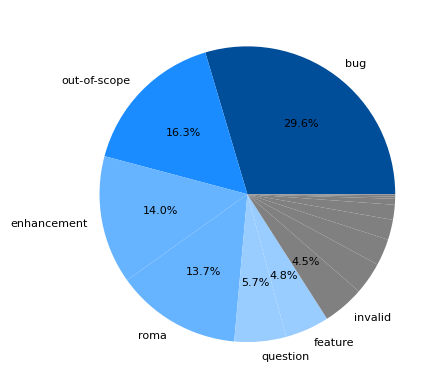

In [80]:
plt_pieChart(df_result,'mapLabel','countofissues')

Review of Round 2

0. facebook/react-native	

In [81]:
remaining_label_details(r[0])

       mapLabel  countofissues
0  out-of-scope          16140
1          roma           3731
2           bug           3591
3      question             64
4   enhancement             61


,repository_name,label,count,percentage
0,facebook/react-native,Stale,2499,0.669794
1,facebook/react-native,Needs: Triage :mag:,1653,0.443045
2,facebook/react-native,Platform: Android,684,0.183329
3,facebook/react-native,Platform: iOS,538,0.144197
4,facebook/react-native,Needs: Author Feedback,403,0.108014
5,facebook/react-native,Resolution: Answered,205,0.054945
6,facebook/react-native,Needs: Environment Info,163,0.043688
7,facebook/react-native,Type: New Architecture,159,0.042616
8,facebook/react-native,Component: TextInput,146,0.039132
9,facebook/react-native,Newer Patch Available,144,0.038596


1. spring-projects/spring-boot

In [82]:
remaining_label_details(r[1])

        mapLabel  countofissues
0   out-of-scope          12109
1        invalid           4151
2            bug           3407
3    enhancement           3298
4      duplicate           1451
5        wontfix           1261
6  documentation           1170
7       question           1031
8           roma            517


,repository_name,label,count,percentage
0,spring-projects/spring-boot,type: regression,274,0.529981
1,spring-projects/spring-boot,type: blocker,122,0.235977
2,spring-projects/spring-boot,type: wiki-documentation,88,0.170213
3,spring-projects/spring-boot,status: feedback-provided,31,0.059961
4,spring-projects/spring-boot,theme: config-data,6,0.011605
5,spring-projects/spring-boot,type: epic,4,0.007737
6,spring-projects/spring-boot,status: on-hold,3,0.005803
7,spring-projects/spring-boot,theme: aot,3,0.005803
8,spring-projects/spring-boot,theme: performance,2,0.003868
9,spring-projects/spring-boot,status: waiting-for-feedback,2,0.003868


2. elastic/elasticsearch

In [83]:
remaining_label_details(r[2])

        mapLabel  countofissues
0            bug           5930
1           test           5269
2    enhancement           4266
3           roma           4131
4  documentation           1319
5        feature            838
6     discussion            792


,repository_name,label,count,percentage
0,elastic/elasticsearch,feedback_needed,759,0.183733
1,elastic/elasticsearch,Team:Delivery,587,0.142096
2,elastic/elasticsearch,:Delivery/Build,372,0.090051
3,elastic/elasticsearch,:Search/Search,321,0.077705
4,elastic/elasticsearch,:Delivery/Packaging,220,0.053256
5,elastic/elasticsearch,>non-issue,219,0.053014
6,elastic/elasticsearch,:Core/Infra/Core,210,0.050835
7,elastic/elasticsearch,help wanted,208,0.050351
8,elastic/elasticsearch,:Analytics/Aggregations,192,0.046478
9,elastic/elasticsearch,>breaking,187,0.045267


3. spring-projects/spring-framework

In [84]:
remaining_label_details(r[3])

        mapLabel  countofissues
0    enhancement           8974
1            bug           5036
2           roma           2322
3        invalid           1723
4        wontfix           1714
5   out-of-scope           1454
6  documentation            906
7      duplicate            699


,repository_name,label,count,percentage
0,spring-projects/spring-framework,in: core,816,0.351421
1,spring-projects/spring-framework,status: bulk-closed,765,0.329457
2,spring-projects/spring-framework,in: web,573,0.24677
3,spring-projects/spring-framework,for: stackoverflow,225,0.096899
4,spring-projects/spring-framework,type: dependency-upgrade,207,0.089147
5,spring-projects/spring-framework,in: data,177,0.076227
6,spring-projects/spring-framework,for: external-project,174,0.074935
7,spring-projects/spring-framework,status: superseded,134,0.057709
8,spring-projects/spring-framework,in: test,76,0.03273
9,spring-projects/spring-framework,in: messaging,72,0.031008


4. ReactiveX/RxJava

In [85]:
remaining_label_details(r[4])

        mapLabel  countofissues
0       question           1138
1           roma            292
2            bug            266
3    enhancement            202
4  documentation            168
5   out-of-scope            132
6        feature            124
7     discussion            113


,repository_name,label,count,percentage
0,ReactiveX/RxJava,2.x,89,0.304795
1,ReactiveX/RxJava,Test-Failures,54,0.184932
2,ReactiveX/RxJava,PR welcome,51,0.174658
3,ReactiveX/RxJava,3.x,49,0.167808
4,ReactiveX/RxJava,Invalid,45,0.15411
5,ReactiveX/RxJava,Shortcoming,27,0.092466
6,ReactiveX/RxJava,Cleanup,24,0.082192
7,ReactiveX/RxJava,Build,22,0.075342
8,ReactiveX/RxJava,Android,21,0.071918
9,ReactiveX/RxJava,1.x,20,0.068493


5. apache/dubbo

In [86]:
remaining_label_details(r[5])

      mapLabel  countofissues
0          bug            631
1     question            531
2         roma            421
3     proposal            112
4      feature             92
5   discussion             90
6  refactoring             23
7  enhancement             16


,repository_name,label,count,percentage
0,apache/dubbo,help wanted,211,0.501188
1,apache/dubbo,good first issue,109,0.258907
2,apache/dubbo,status/waiting-for-feedback,62,0.147268
3,apache/dubbo,type/suspicious,56,0.133017
4,apache/dubbo,status/need-triage,33,0.078385
5,apache/dubbo,level/easy,22,0.052257
6,apache/dubbo,version/2.7.x,14,0.033254
7,apache/dubbo,version/3.x,14,0.033254
8,apache/dubbo,type/unit-test,12,0.028504
9,apache/dubbo,type/performance,11,0.026128


6. dbeaver/dbeaver

In [87]:
remaining_label_details(r[6])

      mapLabel  countofissues
0          bug           7307
1      feature           2045
2  enhancement           1018
3     question            786
4         roma            483
5    duplicate             97


,repository_name,label,count,percentage
0,dbeaver/dbeaver,wait for response,90,0.186335
1,dbeaver/dbeaver,x:postgresql,46,0.095238
2,dbeaver/dbeaver,wiki,41,0.084886
3,dbeaver/dbeaver,won't do,36,0.074534
4,dbeaver/dbeaver,x:oracle,35,0.072464
5,dbeaver/dbeaver,x:mssql,34,0.070393
6,dbeaver/dbeaver,x:db2,28,0.057971
7,dbeaver/dbeaver,sp:1,27,0.055901
8,dbeaver/dbeaver,other,25,0.05176
9,dbeaver/dbeaver,xo:linux,19,0.039337


7. SeleniumHQ/selenium

In [88]:
remaining_label_details(r[7])

      mapLabel  countofissues
0         roma           3144
1          bug           1146
2  enhancement            325


,repository_name,label,count,percentage
0,SeleniumHQ/selenium,R-awaiting answer,846,0.269084
1,SeleniumHQ/selenium,C-java,400,0.127226
2,SeleniumHQ/selenium,D-IE,321,0.102099
3,SeleniumHQ/selenium,C-grid,295,0.09383
4,SeleniumHQ/selenium,C-py,294,0.093511
5,SeleniumHQ/selenium,D-firefox,292,0.092875
6,SeleniumHQ/selenium,C-nodejs,272,0.086514
7,SeleniumHQ/selenium,C-dotnet,248,0.07888
8,SeleniumHQ/selenium,needs-triaging,230,0.073155
9,SeleniumHQ/selenium,C-rb,146,0.046438


8. TeamNewPipe/NewPipe

In [89]:
remaining_label_details(r[8])

     mapLabel  countofissues
0         bug           1941
1     feature           1291
2   duplicate           1176
3        roma            454
4    question            302
5  discussion             30
6     wontfix             21


,repository_name,label,count,percentage
0,TeamNewPipe/NewPipe,template ignored,188,0.414097
1,TeamNewPipe/NewPipe,template missing,136,0.299559
2,TeamNewPipe/NewPipe,meta,58,0.127753
3,TeamNewPipe/NewPipe,localisation / translation,18,0.039648
4,TeamNewPipe/NewPipe,device/software specific,16,0.035242
5,TeamNewPipe/NewPipe,help wanted,13,0.028634
6,TeamNewPipe/NewPipe,waiting for author,13,0.028634
7,TeamNewPipe/NewPipe,good first issue,10,0.022026
8,TeamNewPipe/NewPipe,youtube,9,0.019824
9,TeamNewPipe/NewPipe,ASAP,7,0.015419


9. apache/skywalking

In [90]:
remaining_label_details(r[9])

        mapLabel  countofissues
0       question           1847
1            bug            996
2        feature            760
3           roma            339
4        invalid            112
5    enhancement            102
6  documentation             77
7        wontfix             70
8      duplicate             63
9     discussion             57


,repository_name,label,count,percentage
0,apache/skywalking,agent,112,0.330383
1,apache/skywalking,backend,74,0.218289
2,apache/skywalking,core feature,60,0.176991
3,apache/skywalking,plugin,58,0.171091
4,apache/skywalking,good first issue,35,0.103245
5,apache/skywalking,test,34,0.100295
6,apache/skywalking,UI,33,0.097345
7,apache/skywalking,TBD,30,0.088496
8,apache/skywalking,python,20,0.058997
9,apache/skywalking,no update,19,0.056047


10. bazelbuild/bazel

In [91]:
remaining_label_details(r[10])

        mapLabel  countofissues
0            bug           3262
1           roma           2365
2        feature           1923
3  documentation            568
4   out-of-scope            375


,repository_name,label,count,percentage
0,bazelbuild/bazel,untriaged,511,0.216068
1,bazelbuild/bazel,P1,447,0.189006
2,bazelbuild/bazel,under investigation,327,0.138266
3,bazelbuild/bazel,P2,305,0.128964
4,bazelbuild/bazel,type: support / not a bug (process),295,0.124736
5,bazelbuild/bazel,team-OSS,264,0.111628
6,bazelbuild/bazel,team-Rules-CPP,231,0.097674
7,bazelbuild/bazel,breakage,219,0.0926
8,bazelbuild/bazel,more data needed,191,0.080761
9,bazelbuild/bazel,team-Rules-Java,178,0.075264


11. Anuken/Mindustry

In [92]:
remaining_label_details(r[11])

  mapLabel  countofissues
0      bug           2810
1     roma             18


,repository_name,label,count,percentage
0,Anuken/Mindustry,help wanted,8,0.444444
1,Anuken/Mindustry,a disgrace,8,0.444444
2,Anuken/Mindustry,draft,2,0.111111


12. apache/shardingsphere

In [93]:
remaining_label_details(r[12])

        mapLabel  countofissues
0        invalid           2049
1       question           1345
2           roma           1307
3    enhancement           1196
4            bug           1086
5           test            715
6      duplicate            504
7    refactoring            431
8  documentation            215
9        feature            107


,repository_name,label,count,percentage
0,apache/shardingsphere,in: SQL parse,180,0.13772
1,apache/shardingsphere,status: won't fix,167,0.127774
2,apache/shardingsphere,feature: sharding,125,0.095639
3,apache/shardingsphere,type: discussion,106,0.081102
4,apache/shardingsphere,in: proxy,92,0.07039
5,apache/shardingsphere,type: fixed,90,0.06886
6,apache/shardingsphere,type: build,84,0.064269
7,apache/shardingsphere,good first issue,81,0.061974
8,apache/shardingsphere,in: example,68,0.052028
9,apache/shardingsphere,mode: cluster,59,0.045142


13. OpenAPITools/openapi-generator	

In [94]:
remaining_label_details(r[13])

       mapLabel  countofissues
0           bug           2063
1   enhancement            654
2          roma            148
3       feature             62
4      question             22
5  out-of-scope             21
6    discussion             11
7    suggestion              8


,repository_name,label,count,percentage
0,OpenAPITools/openapi-generator,Client: Python,29,0.195946
1,OpenAPITools/openapi-generator,Client: TypeScript,17,0.114865
2,OpenAPITools/openapi-generator,Client: Java,9,0.060811
3,OpenAPITools/openapi-generator,Issue: Invalid spec,9,0.060811
4,OpenAPITools/openapi-generator,Server: C++,9,0.060811
5,OpenAPITools/openapi-generator,Swagger-Parser,8,0.054054
6,OpenAPITools/openapi-generator,Server: Java,6,0.040541
7,OpenAPITools/openapi-generator,Issue: Usage/Installation,6,0.040541
8,OpenAPITools/openapi-generator,Server: Spring,6,0.040541
9,OpenAPITools/openapi-generator,Issue: Non-operational,5,0.033784


14. openzipkin/zipkin

In [95]:
remaining_label_details(r[14])

        mapLabel  countofissues
0    enhancement            178
1            bug            156
2       question            156
3           roma            118
4  documentation             16
5      duplicate             13


,repository_name,label,count,percentage
0,openzipkin/zipkin,ui,42,0.355932
1,openzipkin/zipkin,releng,19,0.161017
2,openzipkin/zipkin,cassandra,15,0.127119
3,openzipkin/zipkin,help wanted,14,0.118644
4,openzipkin/zipkin,elasticsearch,14,0.118644
5,openzipkin/zipkin,chore,13,0.110169
6,openzipkin/zipkin,techdebt,10,0.084746
7,openzipkin/zipkin,feedback-needed,8,0.067797
8,openzipkin/zipkin,wontfix,4,0.033898
9,openzipkin/zipkin,server,4,0.033898


15. thingsboard/thingsboard

In [96]:
remaining_label_details(r[15])

        mapLabel  countofissues
0       question           1098
1            bug            644
2        feature            193
3    enhancement              8
4           roma              7
5        invalid              1
6  documentation              1


,repository_name,label,count,percentage
0,thingsboard/thingsboard,Contributions Welcome!,5,0.714286
1,thingsboard/thingsboard,UI,2,0.285714


16. mockito/mockito

In [97]:
remaining_label_details(r[16])

        mapLabel  countofissues
0           roma            229
1    enhancement             69
2            bug             66
3  documentation             38
4       question             34
5        feature             18
6        wontfix             15
7        invalid             14
8    refactoring             12


,repository_name,label,count,percentage
0,mockito/mockito,please contribute,66,0.28821
1,mockito/mockito,continuous integration,52,0.227074
2,mockito/mockito,android,31,0.135371
3,mockito/mockito,java-9,15,0.065502
4,mockito/mockito,awaiting response,11,0.048035
5,mockito/mockito,java-11,9,0.039301
6,mockito/mockito,build,9,0.039301
7,mockito/mockito,injection,7,0.030568
8,mockito/mockito,junit5,7,0.030568
9,mockito/mockito,java-8,6,0.026201


17. elastic/logstash

In [98]:
remaining_label_details(r[17])

        mapLabel  countofissues
0            bug            993
1           roma            680
2    enhancement            509
3  documentation            306
4           test            232
5     discussion             86


,repository_name,label,count,percentage
0,elastic/logstash,blocker,75,0.110294
1,elastic/logstash,meta,55,0.080882
2,elastic/logstash,monitoring,49,0.072059
3,elastic/logstash,v1.5.0,47,0.069118
4,elastic/logstash,new plugin,45,0.066176
5,elastic/logstash,v5.0.0,41,0.060294
6,elastic/logstash,invalid,39,0.057353
7,elastic/logstash,packaging,37,0.054412
8,elastic/logstash,unconfirmed,33,0.048529
9,elastic/logstash,windows,32,0.047059


18. apache/pulsar

In [99]:
remaining_label_details(r[18])

        mapLabel  countofissues
0            bug           2805
1        feature            703
2    enhancement            431
3  documentation            399
4           test            354
5           roma            323
6       question            208


,repository_name,label,count,percentage
0,apache/pulsar,lifecycle/stale,114,0.352941
1,apache/pulsar,PIP,112,0.346749
2,apache/pulsar,Stale,86,0.266254
3,apache/pulsar,help wanted,24,0.074303
4,apache/pulsar,component/build,21,0.065015
5,apache/pulsar,component/client,12,0.037152
6,apache/pulsar,component/function,9,0.027864
7,apache/pulsar,component/broker,9,0.027864
8,apache/pulsar,component/cli,5,0.01548
9,apache/pulsar,type/cleanup,5,0.01548


19. GoogleContainerTools/jib

In [100]:
remaining_label_details(r[19])

        mapLabel  countofissues
0           roma            434
1       question            112
2    enhancement             70
3  documentation             61
4   out-of-scope             51
5       proposal              5


,repository_name,label,count,percentage
0,GoogleContainerTools/jib,area/jib-core,87,0.200461
1,GoogleContainerTools/jib,area/jib-gradle-plugin,81,0.186636
2,GoogleContainerTools/jib,area/jib-maven-plugin,79,0.182028
3,GoogleContainerTools/jib,priority: p2,70,0.16129
4,GoogleContainerTools/jib,priority: p1,65,0.14977
5,GoogleContainerTools/jib,priority:p3,55,0.126728
6,GoogleContainerTools/jib,priority :p0,51,0.117512
7,GoogleContainerTools/jib,cleanup,44,0.101382
8,GoogleContainerTools/jib,type:bug,32,0.073733
9,GoogleContainerTools/jib,good first issue,29,0.06682


20. pinpoint-apm/pinpoint

In [101]:
remaining_label_details(r[20])

       mapLabel  countofissues
0          roma            861
1   enhancement            725
2      question            468
3           bug            356
4  out-of-scope            170
5      proposal             29


,repository_name,label,count,percentage
0,pinpoint-apm/pinpoint,stale,419,0.486643
1,pinpoint-apm/pinpoint,help wanted,191,0.221835
2,pinpoint-apm/pinpoint,module:web,76,0.088269
3,pinpoint-apm/pinpoint,cleanup,62,0.072009
4,pinpoint-apm/pinpoint,module:agent,43,0.049942
5,pinpoint-apm/pinpoint,module:plugin,42,0.04878
6,pinpoint-apm/pinpoint,module:collector,41,0.047619
7,pinpoint-apm/pinpoint,module:project-common,29,0.033682
8,pinpoint-apm/pinpoint,module:batch,17,0.019744
9,pinpoint-apm/pinpoint,ui,16,0.018583


21. apache/druid

In [102]:
remaining_label_details(r[21])

        mapLabel  countofissues
0           roma           1440
1            bug            585
2        feature            305
3    improvement            114
4           test            100
5  documentation             73
6       proposal             56
7     discussion             45
8   out-of-scope             37


,repository_name,label,count,percentage
0,apache/druid,stale,1023,0.710417
1,apache/druid,Uncategorized problem report,337,0.234028
2,apache/druid,Starter,35,0.024306
3,apache/druid,Performance,32,0.022222
4,apache/druid,Contributions Welcome,27,0.01875
5,apache/druid,Apache,25,0.017361
6,apache/druid,Ease of Use,24,0.016667
7,apache/druid,Area - Batch Ingestion,24,0.016667
8,apache/druid,Area - Streaming Ingestion,23,0.015972
9,apache/druid,Area - Querying,22,0.015278


22. questdb/questdb

In [103]:
remaining_label_details(r[22])

        mapLabel  countofissues
0            bug            333
1        feature            190
2           roma             47
3    enhancement             36
4           test             35
5       question             27
6  documentation             18
7    improvement             12


,repository_name,label,count,percentage
0,questdb/questdb,SQL,15,0.319149
1,questdb/questdb,Postgres Wire,10,0.212766
2,questdb/questdb,UI,5,0.106383
3,questdb/questdb,Compatibility,4,0.085106
4,questdb/questdb,Good first issue,3,0.06383
5,questdb/questdb,ILP,3,0.06383
6,questdb/questdb,REST API,3,0.06383
7,questdb/questdb,Tidy up,2,0.042553
8,questdb/questdb,hacktoberfest,2,0.042553
9,questdb/questdb,CI,2,0.042553


23. quarkusio/quarkus

In [104]:
remaining_label_details(r[23])

        mapLabel  countofissues
0            bug           7420
1    enhancement           2755
2       question            580
3           roma            569
4        invalid            320
5   out-of-scope            275
6       proposal            144
7        feature            124
8  documentation             82


,repository_name,label,count,percentage
0,quarkusio/quarkus,triage/duplicate,49,0.086116
1,quarkusio/quarkus,triage/wontfix,46,0.080844
2,quarkusio/quarkus,area/gradle,39,0.068541
3,quarkusio/quarkus,area/persistence,37,0.065026
4,quarkusio/quarkus,area/arc,36,0.063269
5,quarkusio/quarkus,area/jakarta,33,0.057996
6,quarkusio/quarkus,area/smallrye,28,0.049209
7,quarkusio/quarkus,good first issue,25,0.043937
8,quarkusio/quarkus,area/infra,23,0.040422
9,quarkusio/quarkus,area/hibernate-orm,22,0.038664


24. codecentric/spring-boot-admin

In [105]:
remaining_label_details(r[24])

        mapLabel  countofissues
0            bug            337
1    enhancement            303
2           roma            245
3        invalid             86
4      duplicate             71
5        wontfix             32
6     discussion             10
7  documentation             10
8   out-of-scope              7


,repository_name,label,count,percentage
0,codecentric/spring-boot-admin,waiting-for-feedback,179,0.730612
1,codecentric/spring-boot-admin,help wanted,49,0.2
2,codecentric/spring-boot-admin,server,6,0.02449
3,codecentric/spring-boot-admin,client,5,0.020408
4,codecentric/spring-boot-admin,nacos,5,0.020408
5,codecentric/spring-boot-admin,move-to-stackoverflow,3,0.012245
6,codecentric/spring-boot-admin,waiting-for-triage,3,0.012245
7,codecentric/spring-boot-admin,server-ui,2,0.008163
8,codecentric/spring-boot-admin,GraalVM,2,0.008163


25. neo4j/neo4j	

In [106]:
remaining_label_details(r[25])

        mapLabel  countofissues
0            bug           1196
1           roma            404
2        feature            361
3       question             95
4    enhancement             57
5  documentation             21


,repository_name,label,count,percentage
0,neo4j/neo4j,team-cypher,119,0.294554
1,neo4j/neo4j,team-kernel,116,0.287129
2,neo4j/neo4j,cypher,66,0.163366
3,neo4j/neo4j,team-drivers,47,0.116337
4,neo4j/neo4j,operability,33,0.081683
5,neo4j/neo4j,browser,21,0.05198
6,neo4j/neo4j,2.2,14,0.034653
7,neo4j/neo4j,team-packaging,14,0.034653
8,neo4j/neo4j,3.4,14,0.034653
9,neo4j/neo4j,team-ux,13,0.032178


26. redis/jedis

In [107]:
remaining_label_details(r[26])

        mapLabel  countofissues
0    enhancement             69
1            bug             45
2        feature             26
3       question             22
4        wontfix              7
5  documentation              4
6   out-of-scope              4
7           test              2
8           roma              1


,repository_name,label,count,percentage
0,redis/jedis,experimental,1,1.0


27. zaproxy/zaproxy	

In [108]:
remaining_label_details(r[27])

       mapLabel  countofissues
0           bug           1486
1   enhancement           1117
2          roma            554
3      question            340
4       invalid            169
5  out-of-scope            134
6     duplicate            115


,repository_name,label,count,percentage
0,zaproxy/zaproxy,historic,242,0.436823
1,zaproxy/zaproxy,add-on,232,0.418773
2,zaproxy/zaproxy,InsufficientEvidence,102,0.184116
3,zaproxy/zaproxy,Priority-Medium,78,0.140794
4,zaproxy/zaproxy,FalsePositive,69,0.124549
5,zaproxy/zaproxy,Type-Other,68,0.122744
6,zaproxy/zaproxy,Docker,34,0.061372
7,zaproxy/zaproxy,third-party,32,0.057762
8,zaproxy/zaproxy,wontfix,26,0.046931
9,zaproxy/zaproxy,unittest,24,0.043321


28. grpc/grpc-java

In [109]:
remaining_label_details(r[28])

        mapLabel  countofissues
0       question            514
1           roma            302
2            bug            301
3    enhancement            225
4   out-of-scope             63
5  documentation             47
6        feature              4


,repository_name,label,count,percentage
0,grpc/grpc-java,code health,102,0.337748
1,grpc/grpc-java,api-breaking,55,0.182119
2,grpc/grpc-java,okhttp,38,0.125828
3,grpc/grpc-java,netty,28,0.092715
4,grpc/grpc-java,usability,22,0.072848
5,grpc/grpc-java,performance,19,0.062914
6,grpc/grpc-java,P1,15,0.049669
7,grpc/grpc-java,android,12,0.039735
8,grpc/grpc-java,highly flaky,8,0.02649
9,grpc/grpc-java,duplicate,8,0.02649


29. Netflix/conductor

In [110]:
remaining_label_details(r[29])

        mapLabel  countofissues
0           roma            207
1            bug            160
2       question             51
3  documentation             37
4    enhancement             35
5        feature             20
6        invalid              2
7      duplicate              1


,repository_name,label,count,percentage
0,Netflix/conductor,Stale,182,0.879227
1,Netflix/conductor,help_wanted,25,0.120773
2,Netflix/conductor,UI,2,0.009662
3,Netflix/conductor,conductor-3.0,1,0.004831
4,Netflix/conductor,good first issue,1,0.004831


Round 3 - Confidence = 100%

In [111]:
label_mapping_df_3 = pd.read_excel("/Users/isdeniz/Documents/github/Summary-2406/label_mapping_round3_2406.xlsx")
label_mapping_df_3.head()

,rule,src_project,src_project_label,mapLabel,confidence,defined_label_description,notes
0,0,spring-projects/spring-boot,type: regression,bug,1,A regression from a previous release,In spring-projects/spring-boot : A bug that is also a regression By definition it refers to a bug.
1,1,spring-projects/spring-boot,type: wiki-documentation,documentation,1,A documentation update required on the wiki,Ex: #38545
2,2,spring-projects/spring-boot,type: epic,feature,1,An issue tracking a large piece of work that will be split into smaller issues,NaN
3,3,elastic/elasticsearch,>non-issue,out-of-scope,1,NaN,Ex: #104162 #105198 It seems that this type is using for announcements.
4,4,spring-projects/spring-framework,for: stackoverflow,question,1,A question that's better suited to stackoverflow.com,NaN


In [112]:
i = 0
while i < label_mapping_df_3.shape[0]:
    filtered_df.loc[filtered_df['mapLabel'] == 'roma', 'mapLabel'] = filtered_df.loc[filtered_df['mapLabel'] == 'roma'].apply(lambda row: label_mapping(row['repository_name'], row['labels_name'], i, label_mapping_df_3), axis = 1)
    i = i + 1 

In [113]:
remaining_label_details_total()

          mapLabel  countofissues          %
0              bug          56661  29.753303
1     out-of-scope          31595  16.590876
2      enhancement          26699  14.019933
3             roma          18926   9.938247
4         question          10999   5.775694
5          feature           9190   4.825768
6          invalid           8832   4.637779
7             test           6893   3.619589
8    documentation           5624   2.953223
9            stale           5080   2.667563
10       duplicate           4247   2.230146
11         wontfix           3396   1.783276
12      discussion           1338   0.702598
13     refactoring            466   0.244702
14        proposal            346   0.181688
15     improvement            126   0.066164
16  technical-debt             10   0.005251
17      suggestion              8   0.004201
190436


In [114]:
filtered_df['mapLabel'].value_counts()

mapLabel
bug               56661
out-of-scope      31595
enhancement       26699
roma              18926
question          10999
feature            9190
invalid            8832
test               6893
documentation      5624
stale              5080
duplicate          4247
wontfix            3396
discussion         1338
refactoring         466
proposal            346
improvement         126
technical-debt       10
suggestion            8
Name: count, dtype: int64

In [115]:
filtered_df.to_pickle('labelMapping_2406.pkl')

In [116]:
filtered_df.to_csv('labelMapping_2406.csv')